In [ ]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

# always display all the columns present
pd.pandas.set_option('display.max_columns',None)

In [ ]:
#read the csv file and save it in df
df=pd.read_csv('Loanapproval.csv')

In [ ]:
# print shape of dataset with rows and columns
print(df.shape)

(614, 13)


In [ ]:
#for simplification during coding, keep all the column names in lowercase
df.columns = df.columns.str.lower()

In [ ]:
# print the top5 records
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Exploratory Data Analysis

In [ ]:
df.isnull().sum()

,0
loan_id,0
gender,13
married,3
dependents,15
education,0
self_employed,32
applicantincome,0
coapplicantincome,0
loanamount,22
loan_amount_term,14


In [ ]:
newdf = df.dropna()

In [ ]:
newdf.isnull().sum()

,0
loan_id,0
gender,0
married,0
dependents,0
education,0
self_employed,0
applicantincome,0
coapplicantincome,0
loanamount,0
loan_amount_term,0


In [ ]:
#Drop the index column as we don't have to use it
newdf.drop(['loan_id'],axis=1,inplace=True)
newdf

<ipython-input-89-8e5fecd968da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(['loan_id'],axis=1,inplace=True)


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
newdf.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             480 non-null    object 
 1   married            480 non-null    object 
 2   dependents         480 non-null    object 
 3   education          480 non-null    object 
 4   self_employed      480 non-null    object 
 5   applicantincome    480 non-null    int64  
 6   coapplicantincome  480 non-null    float64
 7   loanamount         480 non-null    float64
 8   loan_amount_term   480 non-null    float64
 9   credit_history     480 non-null    float64
 10  property_area      480 non-null    object 
 11  loan_status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


Convert categorical data into numerical

In [ ]:
#Now let's convert categorical data to numerical
newdf['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
education = {'Graduate': 1, 'Not Graduate': 0}

In [ ]:
newdf['education'] = newdf['education'].apply(lambda x: education[x])
newdf

<ipython-input-93-76ab0e3662df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['education'] = newdf['education'].apply(lambda x: education[x])


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
newdf['self_employed'].unique()

array([0, 1])

In [ ]:
self_employed = {'Yes': 1, 'No': 0}

In [ ]:
newdf['self_employed'] = newdf['self_employed'].apply(lambda x: self_employed[x])

KeyError: 0

In [ ]:
newdf

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
newdf['property_area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
property_area = {'Urban': 2, 'Semiurban': 1, 'Rural': 0}

In [ ]:
newdf['property_area'] = newdf['property_area'].apply(lambda x: property_area[x])

<ipython-input-104-65c2ee423c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['property_area'] = newdf['property_area'].apply(lambda x: property_area[x])


In [ ]:
newdf['loan_status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
load_status = {'Y': 1, 'N': 0}

In [ ]:
newdf['loan_status'] = newdf['loan_status'].apply(lambda x: load_status[x])

<ipython-input-108-87eae94b9114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['loan_status'] = newdf['loan_status'].apply(lambda x: load_status[x])


In [ ]:
newdf

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,Male,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,Male,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,Male,No,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,Male,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,Male,Yes,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,Male,Yes,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,Male,Yes,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
newdf['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
gender = {'Male': 1, 'Female': 0}

In [ ]:
newdf['gender'] = newdf['gender'].apply(lambda x: gender[x])

<ipython-input-113-7ea4767a5c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['gender'] = newdf['gender'].apply(lambda x: gender[x])


In [ ]:
newdf['married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
married = {'Yes': 1, 'No': 0}

In [ ]:
newdf['married'] = newdf['married'].apply(lambda x: married[x])

<ipython-input-116-7bf0cb8c5400>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['married'] = newdf['married'].apply(lambda x: married[x])


In [ ]:
newdf.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


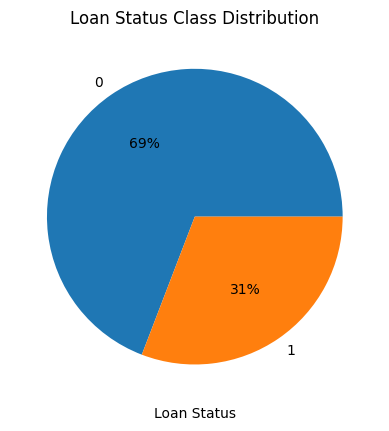

In [ ]:


#Visualizing categorical data after making them numerical
plt.pie(x=newdf['loan_status'].value_counts().values,labels=newdf['loan_status'].unique(),autopct='%.0f%%')
plt.xlabel('Loan Status')
plt.title('Loan Status Class Distribution')
plt.show()



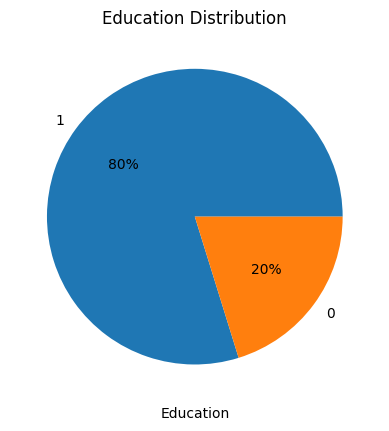

In [ ]:
plt.pie(x=newdf['education'].value_counts().values,labels=newdf['education'].unique(),autopct='%.0f%%')
plt.xlabel('Education')
plt.title('Education Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
newdf.loc[:, 'dependents'] = newdf['dependents'].replace("3+", 3).astype(int)

In [ ]:
x = newdf.drop(['loan_status'], axis=1)
y = newdf['loan_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#MinMax scaler is used to rescale the values of the columns between 0 and 1.
scaler = MinMaxScaler()

In [ ]:
#Making two sets of columns numerical and categorical
categorical = ['education', 'self_employed', 'married', 'gender', 'loan_status', 'property_area']
numerical = list(set(newdf.columns) - set(['loan_status']) - set(categorical))
numerical

['credit_history',
 'loan_amount_term',
 'coapplicantincome',
 'dependents',
 'loanamount',
 'applicantincome']

In [ ]:
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_train[numerical]

,credit_history,loan_amount_term,coapplicantincome,dependents,loanamount,applicantincome
172,1.0,0.324324,0.000000,1.000000,0.121827,0.041707
288,1.0,0.729730,0.000000,0.000000,0.179357,0.049153
607,1.0,0.729730,0.041700,0.666667,0.250423,0.047458
55,1.0,0.729730,0.034489,0.666667,0.148900,0.031639
461,1.0,0.324324,0.000000,1.000000,0.201354,0.093878
...,...,...,...,...,...,...
141,1.0,0.729730,0.000000,0.000000,0.269036,0.065145
350,1.0,0.729730,0.000000,0.000000,0.370558,0.110489
445,1.0,0.729730,0.035760,0.333333,0.204738,0.041014
558,1.0,0.729730,0.078878,0.000000,0.258883,0.046221


In [ ]:
x_test[numerical] = scaler.transform(x_test[numerical])
x_test[numerical]

,credit_history,loan_amount_term,coapplicantincome,dependents,loanamount,applicantincome
92,1.0,0.72973,0.053787,0.666667,0.121827,0.038627
529,1.0,0.72973,0.000000,0.000000,0.204738,0.082041
505,1.0,0.72973,0.130508,0.666667,0.395939,0.041558
358,0.0,1.00000,0.049236,0.000000,0.153976,0.035250
512,1.0,0.72973,0.060141,0.666667,0.235195,0.038751
...,...,...,...,...,...,...
281,1.0,0.72973,0.023643,0.000000,0.174281,0.046716
299,1.0,0.72973,0.086444,0.333333,0.175973,0.023055
522,1.0,0.72973,0.042084,1.000000,0.153976,0.068361
33,1.0,0.72973,0.049266,0.000000,0.177665,0.041435


In [ ]:
reg = LogisticRegression(random_state = 42, solver = 'newton-cholesky', verbose = 1)

In [ ]:
reg.fit(x_train,y_train)

Newton iter=1
  Check Convergence
    1. max |gradient| 0.024350591613318 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.001218123080002873 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 5.0697953490816405e-06 <= 0.0001
    2. Newton decrement 1.3286841945138538e-05 <= 0.0001
  Solver did converge at loss = 0.4940679977145988.


LogisticRegression(random_state=42, solver='newton-cholesky', verbose=1)

In [ ]:


y_pred = reg.predict(x_test)



In [ ]:
#Creating a function to display model results
def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

Classification Report for Data Test
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



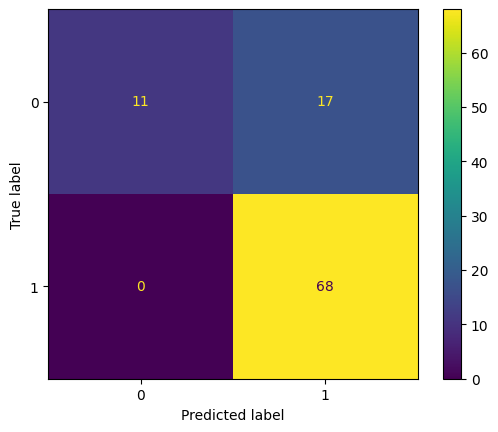

In [ ]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)